In [3]:
pip install duckdb pandas matplotlib seaborn statsmodels scipy --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Connect to the DuckDB database
con = duckdb.connect(database='../../gov-contracts.db', read_only=True)

In [5]:
# Query to select relevant columns
query = '''
SELECT 
    department_ind_agency,
    cgac,
    sub_tier,
    fpds_code,
    office,
    aac_code,
    posteddate,
    type,
    basetype,
    popstreetaddress,
    popcity,
    popstate,
    popzip,
    popcountry,
    active,
    awardnumber,
    awarddate,
    award,
    awardee,
    state,
    city,
    zipcode,
    countrycode
FROM 
    ContractOpportunitiesFull
WHERE
    award IS NOT NULL
'''

# Execute the query and load data into a DataFrame
df = con.execute(query).fetchdf()
df

,department_ind_agency,cgac,sub_tier,fpds_code,office,aac_code,posteddate,type,basetype,popstreetaddress,...,popcountry,active,awardnumber,awarddate,award,awardee,state,city,zipcode,countrycode
0,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M4,2024-01-12 21:35:40.45-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M424D60DN,2024-01-12,2.500000e+05,ROBECK FLUID POWER CO.,OH,COLUMBUS,43218-3990,USA
1,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M3,2024-01-12 19:36:27.523-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M324P0759,2024-01-12,5.605392e+04,T and T Products LLC,OH,COLUMBUS,43218-3990,USA
2,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,NAC FEDERAL SUPPLY SCHEDULE (36F797),36F797,2024-01-12 19:01:03.638-05,Award Notice,Award Notice,None,...,None,Yes,36F79724D0053,2024-01-12,2.500000e+05,FORCE TECHNOLOGY SOLUTIONS LTD EAGLEVILLE 19403,IL,HINES,60141,USA
3,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W071 ENDIST SEATTLE,W912DW,2024-01-12 18:36:49.162-05,Award Notice,Solicitation,None,...,USA,Yes,W912DW24D4000,2024-01-12,1.000000e+07,Northwest Planning Solutions JV Colorado Sprin...,WA,SEATTLE,98134-2329,USA
4,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M1,2024-01-12 18:36:24.663-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M124P2648,2024-01-12,3.236600e+04,CIRCOR NAVAL SOLUTIONS LLC,OH,COLUMBUS,43218-3990,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:41:49.166-05,Award Notice,Award Notice,None,...,None,Yes,SPE2D2-19-D-0067,2018-11-01,4.993470e+06,Perrigo Sourcing solutions Allegan MI USA,PA,PHILADELPHIA,19111,USA
10739,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL INFORMATION WARFARE SYSTEMS,N00039,2019-12-03 12:00:35.525-05,Award Notice,Award Notice,"8650 Balboa Avenue, San Diego, CA",...,USA,Yes,N00039-20-D-0021,2019-11-15,1.003455e+08,Raytheon Company,CA,SAN DIEGO,92110-3127,USA
10740,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-11-22 17:22:21.266-05,Award Notice,Award Notice,None,...,USA,Yes,SPE2D220D0085,2019-11-14,2.476296e+06,"GOLDEN STATE MEDICAL SUPPLY, INC. Camarillo CA...",PA,PHILADELPHIA,19111,USA
10741,"JUSTICE, DEPARTMENT OF",15.0,FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,1540,FDC TUCSON,15B615,2018-06-20 17:14:13-04,Award Notice,Combined Synopsis/Solicitation,9300 S. Wilmot Road,...,USA,Yes,15B61518PT8L30001,2018-06-20,7.798800e+04,McCook Boiler and Pump,AZ,TUCSON,85706,USA


In [6]:
# Load data# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

department_ind_agency        0
cgac                         0
sub_tier                     0
fpds_code                    0
office                       0
aac_code                     0
posteddate                   0
type                         0
basetype                     0
popstreetaddress         10660
popcity                   9551
popstate                  9550
popzip                    9692
popcountry                9390
active                       0
awardnumber                 48
awarddate                    0
award                        0
awardee                     37
state                       18
city                        16
zipcode                      2
countrycode                  0
dtype: int64


In [7]:
# For simplicity, drop rows with missing values in key columns
df = df.dropna(subset=['award', 'cgac', 'awardee', 'state'])
df

,department_ind_agency,cgac,sub_tier,fpds_code,office,aac_code,posteddate,type,basetype,popstreetaddress,...,popcountry,active,awardnumber,awarddate,award,awardee,state,city,zipcode,countrycode
0,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M4,2024-01-12 21:35:40.45-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M424D60DN,2024-01-12,2.500000e+05,ROBECK FLUID POWER CO.,OH,COLUMBUS,43218-3990,USA
1,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M3,2024-01-12 19:36:27.523-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M324P0759,2024-01-12,5.605392e+04,T and T Products LLC,OH,COLUMBUS,43218-3990,USA
2,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,NAC FEDERAL SUPPLY SCHEDULE (36F797),36F797,2024-01-12 19:01:03.638-05,Award Notice,Award Notice,None,...,None,Yes,36F79724D0053,2024-01-12,2.500000e+05,FORCE TECHNOLOGY SOLUTIONS LTD EAGLEVILLE 19403,IL,HINES,60141,USA
3,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W071 ENDIST SEATTLE,W912DW,2024-01-12 18:36:49.162-05,Award Notice,Solicitation,None,...,USA,Yes,W912DW24D4000,2024-01-12,1.000000e+07,Northwest Planning Solutions JV Colorado Sprin...,WA,SEATTLE,98134-2329,USA
4,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M1,2024-01-12 18:36:24.663-05,Award Notice,Award Notice,None,...,None,Yes,SPE7M124P2648,2024-01-12,3.236600e+04,CIRCOR NAVAL SOLUTIONS LLC,OH,COLUMBUS,43218-3990,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:41:49.166-05,Award Notice,Award Notice,None,...,None,Yes,SPE2D2-19-D-0067,2018-11-01,4.993470e+06,Perrigo Sourcing solutions Allegan MI USA,PA,PHILADELPHIA,19111,USA
10739,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL INFORMATION WARFARE SYSTEMS,N00039,2019-12-03 12:00:35.525-05,Award Notice,Award Notice,"8650 Balboa Avenue, San Diego, CA",...,USA,Yes,N00039-20-D-0021,2019-11-15,1.003455e+08,Raytheon Company,CA,SAN DIEGO,92110-3127,USA
10740,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-11-22 17:22:21.266-05,Award Notice,Award Notice,None,...,USA,Yes,SPE2D220D0085,2019-11-14,2.476296e+06,"GOLDEN STATE MEDICAL SUPPLY, INC. Camarillo CA...",PA,PHILADELPHIA,19111,USA
10741,"JUSTICE, DEPARTMENT OF",15.0,FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,1540,FDC TUCSON,15B615,2018-06-20 17:14:13-04,Award Notice,Combined Synopsis/Solicitation,9300 S. Wilmot Road,...,USA,Yes,15B61518PT8L30001,2018-06-20,7.798800e+04,McCook Boiler and Pump,AZ,TUCSON,85706,USA


In [8]:
# Convert 'awarddate' and 'posteddate' to datetime
df['awarddate'] = pd.to_datetime(df['awarddate'], errors='coerce')
df['posteddate'] = pd.to_datetime(df['posteddate'], errors='coerce')

# Convert 'award' to numeric
df['award'] = pd.to_numeric(df['award'], errors='coerce')

# Drop rows with invalid dates or award amounts
df = df.dropna(subset=['awarddate', 'posteddate', 'award'])
df

/var/folders/xz/9d0gd46n5lgfq9x35p2g02sw0000gn/T/ipykernel_90557/638420581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['awarddate'] = pd.to_datetime(df['awarddate'], errors='coerce')
/var/folders/xz/9d0gd46n5lgfq9x35p2g02sw0000gn/T/ipykernel_90557/638420581.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posteddate'] = pd.to_datetime(df['posteddate'], errors='coerce')
/var/folders/xz/9d0gd46n5lgfq9x35p2g02sw0000gn/T/ipykernel_90557/638420581.py:3: SettingWi

,department_ind_agency,cgac,sub_tier,fpds_code,office,aac_code,posteddate,type,basetype,popstreetaddress,...,popcountry,active,awardnumber,awarddate,award,awardee,state,city,zipcode,countrycode
0,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M4,2024-01-12 21:35:40.450000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE7M424D60DN,2024-01-12,2.500000e+05,ROBECK FLUID POWER CO.,OH,COLUMBUS,43218-3990,USA
1,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M3,2024-01-12 19:36:27.523000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE7M324P0759,2024-01-12,5.605392e+04,T and T Products LLC,OH,COLUMBUS,43218-3990,USA
2,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,NAC FEDERAL SUPPLY SCHEDULE (36F797),36F797,2024-01-12 19:01:03.638000-05:00,Award Notice,Award Notice,None,...,None,Yes,36F79724D0053,2024-01-12,2.500000e+05,FORCE TECHNOLOGY SOLUTIONS LTD EAGLEVILLE 19403,IL,HINES,60141,USA
3,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W071 ENDIST SEATTLE,W912DW,2024-01-12 18:36:49.162000-05:00,Award Notice,Solicitation,None,...,USA,Yes,W912DW24D4000,2024-01-12,1.000000e+07,Northwest Planning Solutions JV Colorado Sprin...,WA,SEATTLE,98134-2329,USA
4,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA LAND AND MARITIME,SPE7M1,2024-01-12 18:36:24.663000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE7M124P2648,2024-01-12,3.236600e+04,CIRCOR NAVAL SOLUTIONS LLC,OH,COLUMBUS,43218-3990,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 13:06:20.863000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE2D219D0066,2018-10-26,2.669019e+07,Golden State Medical Supply 5187 Camino Ruiz C...,PA,PHILADELPHIA,19111,USA
10737,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:55:01.722000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE2D2-19-D0063,2018-11-05,1.828359e+07,"Prasco, LLC Mason OH USA",PA,PHILADELPHIA,19111,USA
10738,DEPT OF DEFENSE,97.0,DEFENSE LOGISTICS AGENCY,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:41:49.166000-05:00,Award Notice,Award Notice,None,...,None,Yes,SPE2D2-19-D-0067,2018-11-01,4.993470e+06,Perrigo Sourcing solutions Allegan MI USA,PA,PHILADELPHIA,19111,USA
10739,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL INFORMATION WARFARE SYSTEMS,N00039,2019-12-03 12:00:35.525000-05:00,Award Notice,Award Notice,"8650 Balboa Avenue, San Diego, CA",...,USA,Yes,N00039-20-D-0021,2019-11-15,1.003455e+08,Raytheon Company,CA,SAN DIEGO,92110-3127,USA


In [9]:
# List of categorical variables to encode
categorical_vars = ['department_ind_agency', 'sub_tier', 'type', 'basetype', 'popstate', 'popcountry', 'active', 'awardee', 'state', 'countrycode']

# Use one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)
df_encoded

,cgac,fpds_code,office,aac_code,posteddate,popstreetaddress,popcity,popzip,awardnumber,awarddate,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,countrycode_USA
0,97.0,97AS,DLA LAND AND MARITIME,SPE7M4,2024-01-12 21:35:40.450000-05:00,None,None,None,SPE7M424D60DN,2024-01-12,...,False,False,False,False,False,False,False,False,False,True
1,97.0,97AS,DLA LAND AND MARITIME,SPE7M3,2024-01-12 19:36:27.523000-05:00,None,None,None,SPE7M324P0759,2024-01-12,...,False,False,False,False,False,False,False,False,False,True
2,36.0,3600,NAC FEDERAL SUPPLY SCHEDULE (36F797),36F797,2024-01-12 19:01:03.638000-05:00,None,None,None,36F79724D0053,2024-01-12,...,False,False,False,False,False,False,False,False,False,True
3,21.0,2100,W071 ENDIST SEATTLE,W912DW,2024-01-12 18:36:49.162000-05:00,None,Seattle,None,W912DW24D4000,2024-01-12,...,False,False,False,False,False,True,False,False,False,True
4,97.0,97AS,DLA LAND AND MARITIME,SPE7M1,2024-01-12 18:36:24.663000-05:00,None,None,None,SPE7M124P2648,2024-01-12,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,97.0,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 13:06:20.863000-05:00,None,None,None,SPE2D219D0066,2018-10-26,...,False,False,False,False,False,False,False,False,False,True
10737,97.0,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:55:01.722000-05:00,None,None,None,SPE2D2-19-D0063,2018-11-05,...,False,False,False,False,False,False,False,False,False,True
10738,97.0,97AS,DLA TROOP SUPPORT,SPE2D2,2019-12-04 12:41:49.166000-05:00,None,None,None,SPE2D2-19-D-0067,2018-11-01,...,False,False,False,False,False,False,False,False,False,True
10739,17.0,1700,NAVAL INFORMATION WARFARE SYSTEMS,N00039,2019-12-03 12:00:35.525000-05:00,"8650 Balboa Avenue, San Diego, CA",None,92123,N00039-20-D-0021,2019-11-15,...,False,False,False,False,False,False,False,False,False,True


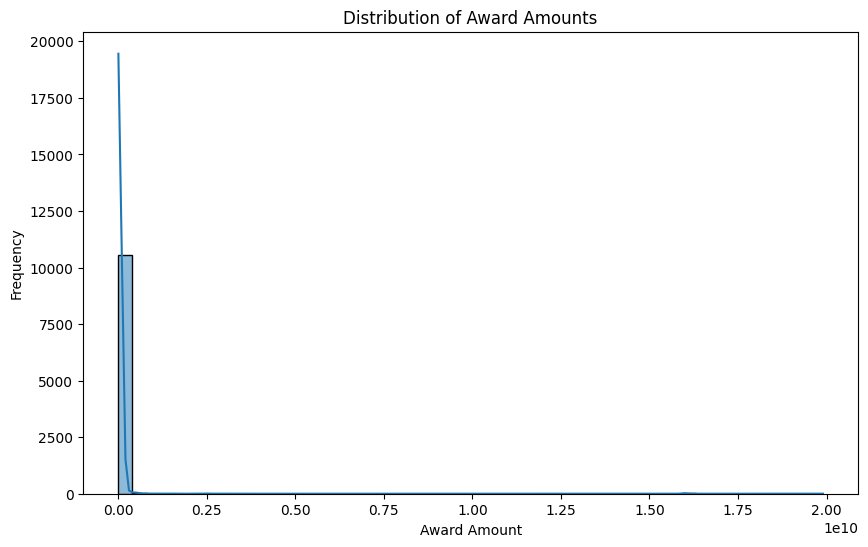

In [10]:
# Histogram of award amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['award'], bins=50, kde=True)
plt.title('Distribution of Award Amounts')
plt.xlabel('Award Amount')
plt.ylabel('Frequency')
plt.show()

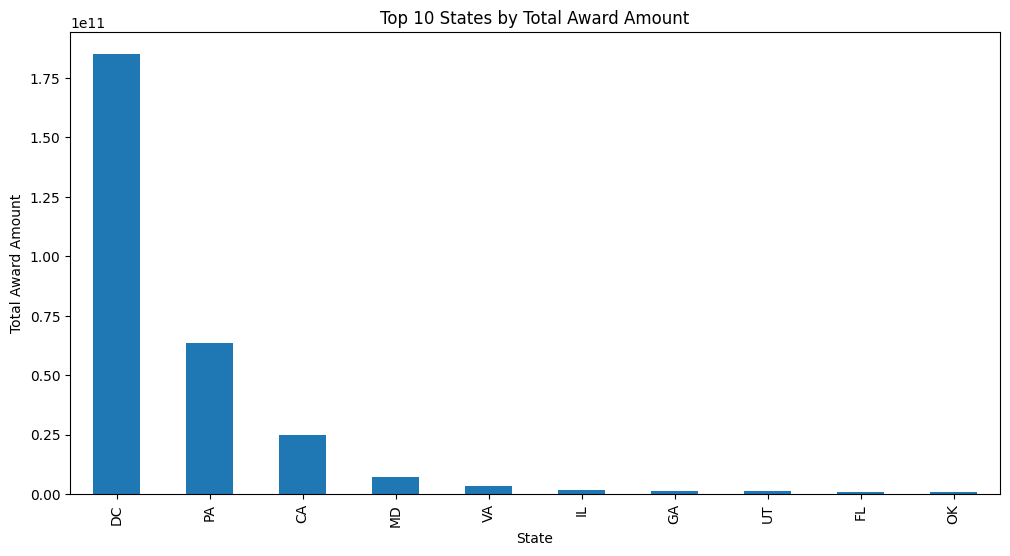

In [11]:
# Top 10 states by total award amount
state_awards = df.groupby('state')['award'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
state_awards.plot(kind='bar')
plt.title('Top 10 States by Total Award Amount')
plt.xlabel('State')
plt.ylabel('Total Award Amount')
plt.show()

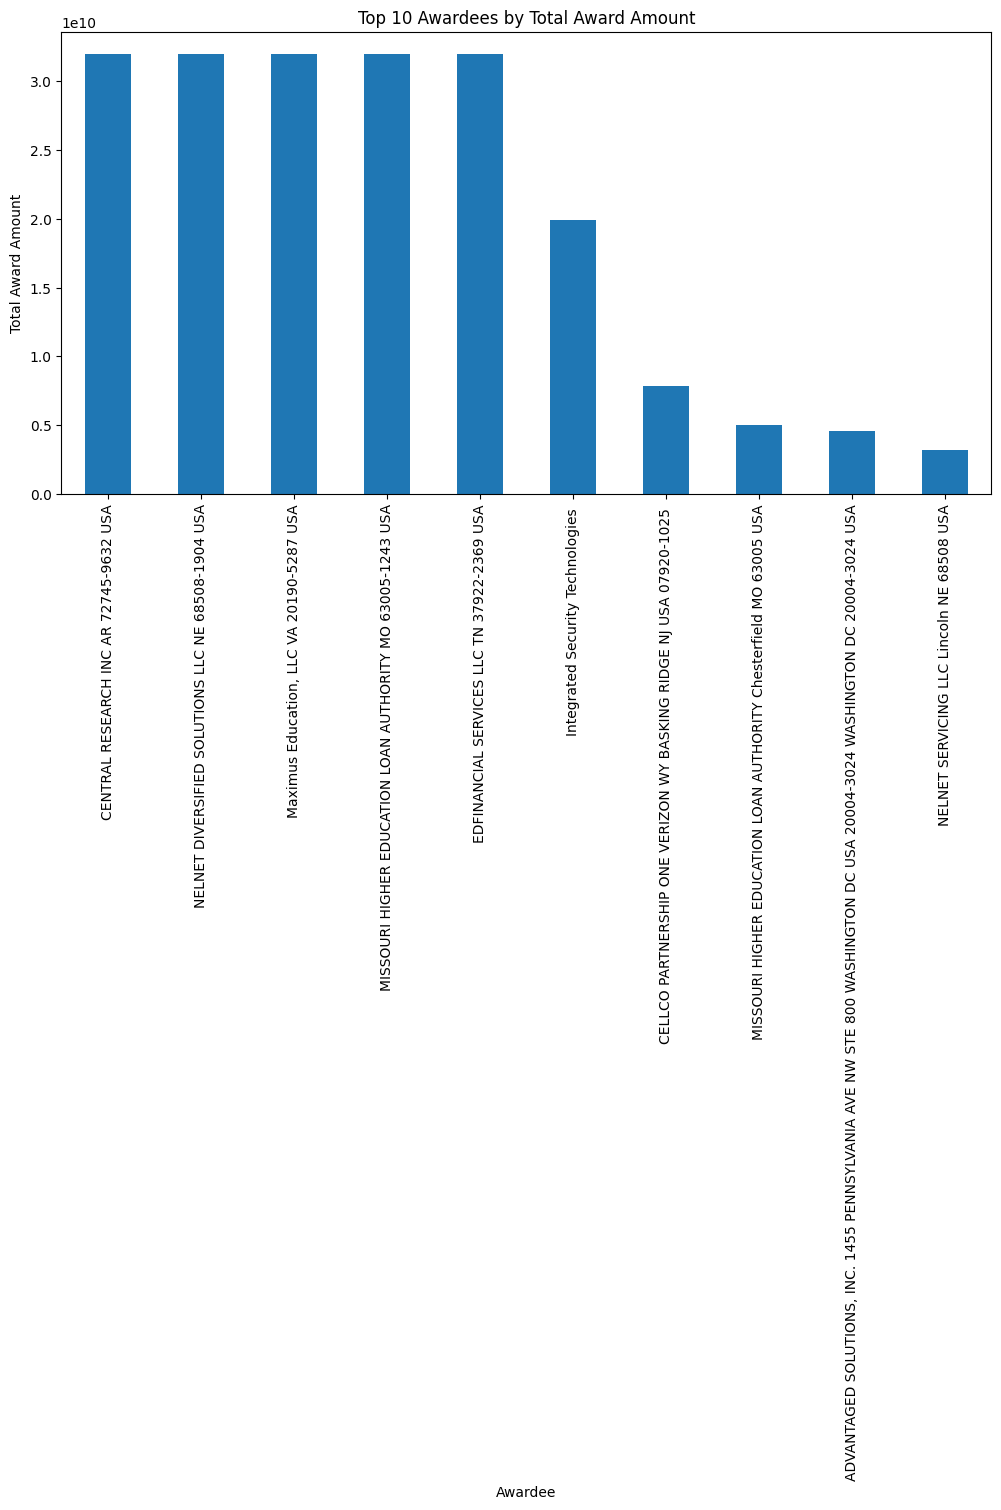

In [12]:
# Top 10 awardees by total award amount
awardee_awards = df.groupby('awardee')['award'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
awardee_awards.plot(kind='bar')
plt.title('Top 10 Awardees by Total Award Amount')
plt.xlabel('Awardee')
plt.ylabel('Total Award Amount')
plt.show()

In [13]:
# Dependent variable
Y = df_encoded['award']

# Independent variables (selecting a subset for simplicity)
X = df_encoded[['cgac'] + [col for col in df_encoded.columns if 'state_' in col or 'type_' in col]]

# Add constant term
X = sm.add_constant(X)